In [1]:
import pandas as pd

# region_id, gene_id, enh_id, avg_dist
gm12878_neanderthal_df_ref = pd.read_parquet("./links/experiment_3/gm12878_neanderthal_df_ref.parquet")
hffc6_neanderthal_df_ref = pd.read_parquet("./links/experiment_3/hffc6_neanderthal_df_ref.parquet")
h1esc_neanderthal_df_ref = pd.read_parquet("./links/experiment_3/h1esc_neanderthal_df_ref.parquet")

# region_id, gene_id, enh_id, avg_dist
gm12878_existing_links = pd.read_csv("./links/experiment_3/gm12878_existing_links.csv")
hffc6_existing_links = pd.read_csv("./links/experiment_3/hffc6_existing_links.csv")
h1esc_existing_links = pd.read_csv("./links/experiment_3/h1esc_existing_links.csv")

In [2]:
distance_cutoff = {
    'H1ESC_Nean': 1.5819487888988626,
    'H1ESC_Deni': 1.5940225214185284,
    'HFFC6_Nean': 1.4982763183612486,
    'HFFC6_Deni': 1.7777412978743463,
    'WTC11_Nean': 0.49185075802354294,
    'WTC11_Deni': 0.49946283771094635,
    'GM12878_Nean': 1.3194976373807719,
    'GM12878_Deni': 1.2678860440889042
}

gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["avg_dist"] > distance_cutoff["GM12878_Nean"]]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["avg_dist"] > distance_cutoff["HFFC6_Nean"]]
h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["avg_dist"] > distance_cutoff["H1ESC_Nean"]]

gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]

gm12878_existing_links = gm12878_existing_links[gm12878_existing_links["avg_dist"] > distance_cutoff["GM12878_Nean"]]
hffc6_existing_links = hffc6_existing_links[hffc6_existing_links["avg_dist"] > distance_cutoff["HFFC6_Nean"]]
h1esc_existing_links = h1esc_existing_links[h1esc_existing_links["avg_dist"] > distance_cutoff["H1ESC_Nean"]]


In [3]:
gm12878_gene_to_closest_avg_enhancer_all = (
    gm12878_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

gm12878_gene_to_closest_avg_enhancer_all['has_link'] = gm12878_gene_to_closest_avg_enhancer_all.index_fields.isin(gm12878_existing_links["gene_id"].unique())

hffc6_gene_to_closest_avg_enhancer_all = (
    hffc6_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

hffc6_gene_to_closest_avg_enhancer_all['has_link'] = hffc6_gene_to_closest_avg_enhancer_all.index_fields.isin(hffc6_existing_links["gene_id"].unique())

h1esc_gene_to_closest_avg_enhancer_all = (
    h1esc_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

h1esc_gene_to_closest_avg_enhancer_all['has_link'] = h1esc_gene_to_closest_avg_enhancer_all.index_fields.isin(h1esc_existing_links["gene_id"].unique())

U-statistic: 4536049.0, p-value: 1.751482612968363e-80


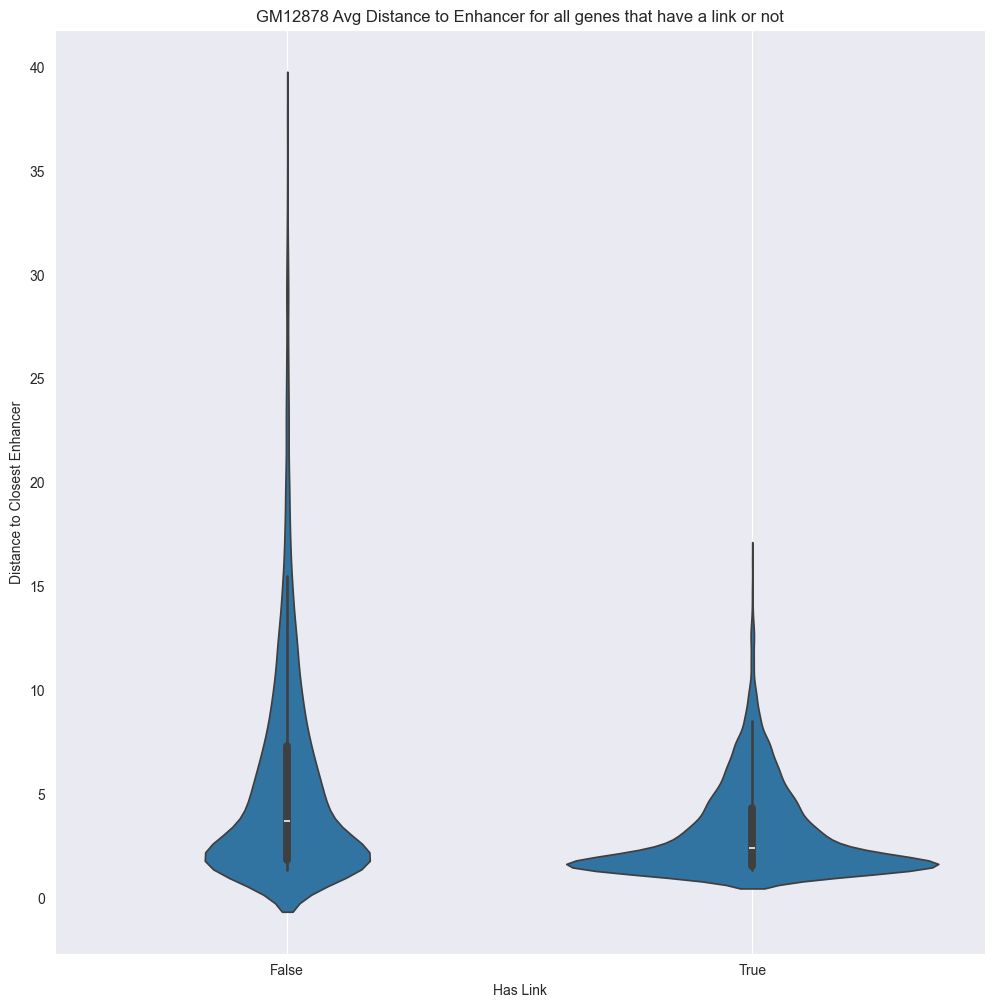

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import starbars

# Box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(12, 12))
ax = sns.violinplot(data=gm12878_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

# show the p value
# starbars.draw_annotation(
#     annotations=[('has_link', 'min_dist', p)],
#     ax=ax
# )

plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("GM12878 Avg Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

U-statistic: 4148058.5, p-value: 4.347657537768038e-85


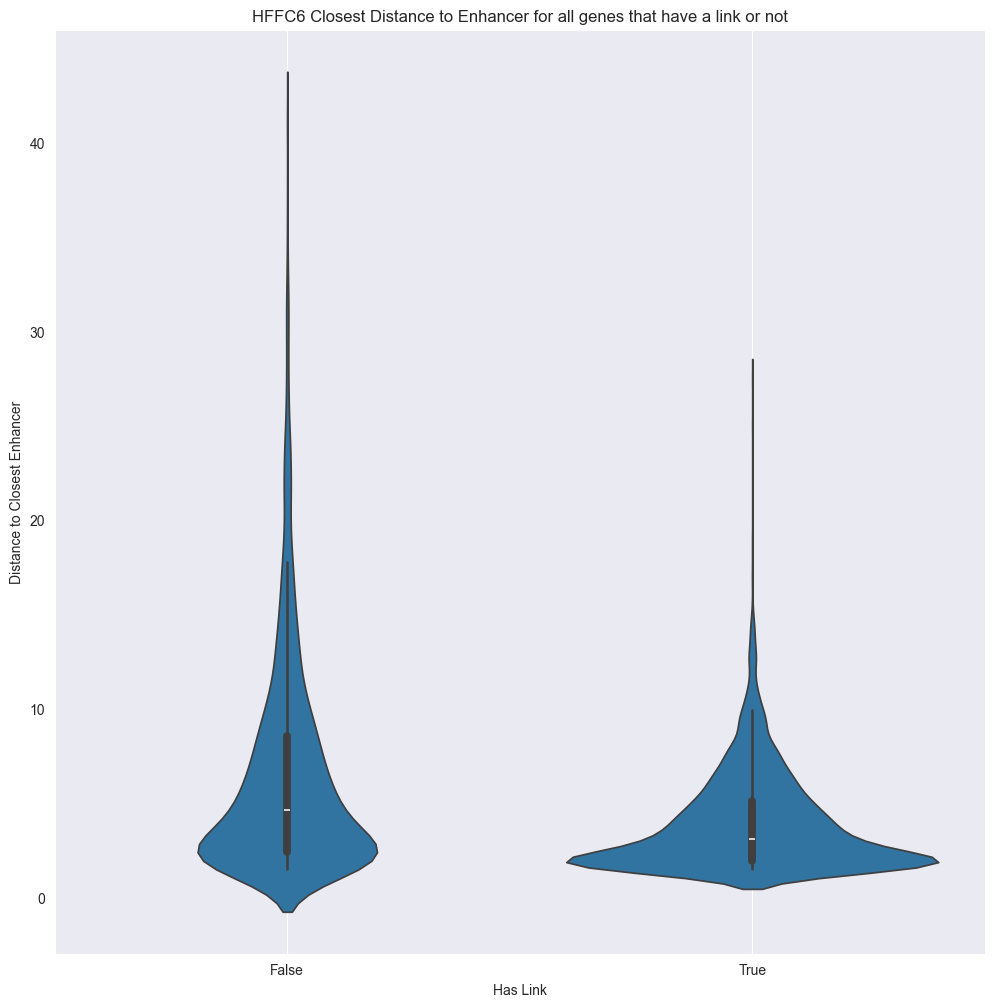

In [5]:
 # Box plot of the distance to the closest enhancer for all genes that have a link or not in HFFC6
plt.figure(figsize=(12, 12))
sns.violinplot(data=hffc6_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("HFFC6 Closest Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

U-statistic: 4433261.0, p-value: 3.338817467062454e-68


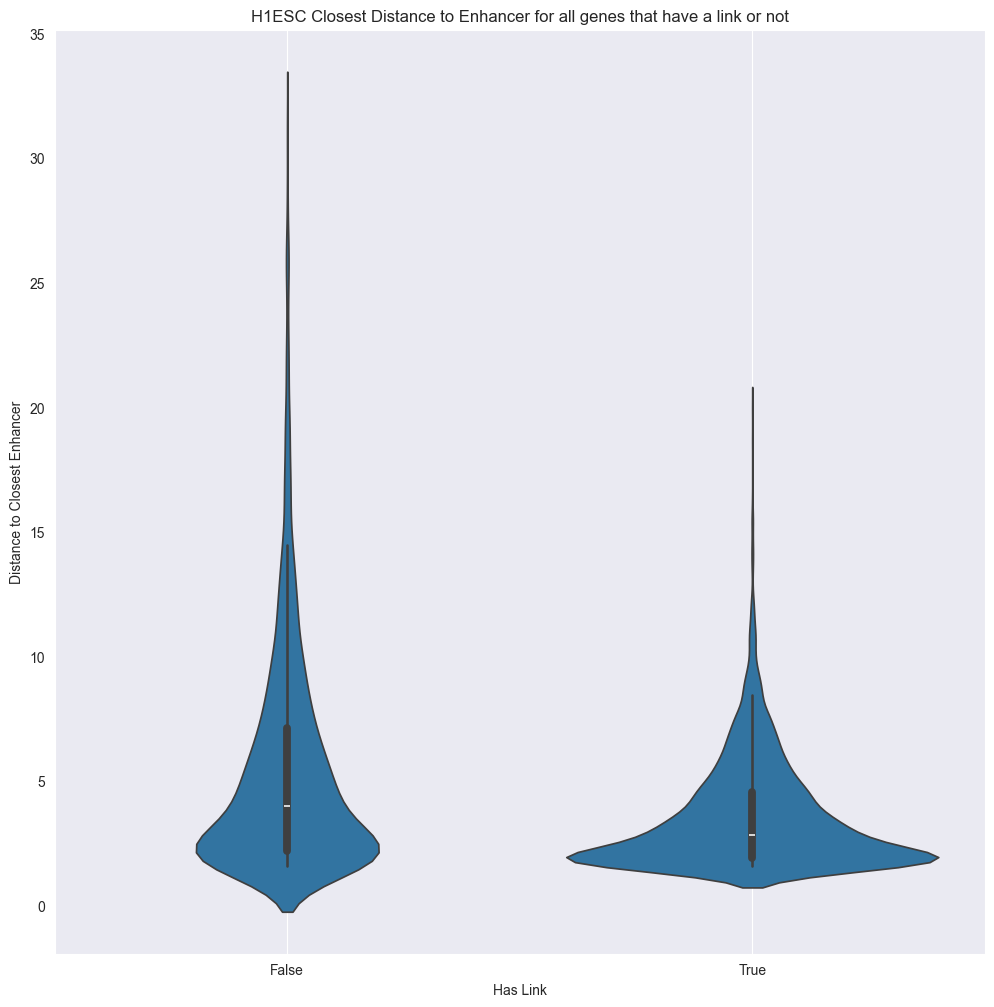

In [14]:
# Box plot of the distance to the closest enhancer for all genes that have a link or not in H1ESC
plt.figure(figsize=(12, 12))
sns.violinplot(data=h1esc_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("H1ESC Closest Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

In [7]:
gm12878_neanderthal_all_pairs_with_has_link = gm12878_neanderthal_df_ref.copy()
gm12878_neanderthal_all_pairs_with_has_link['has_link'] = (
    gm12878_neanderthal_all_pairs_with_has_link['gene_id'].isin(gm12878_existing_links['gene_id'])
    & gm12878_neanderthal_all_pairs_with_has_link['enh_id'].isin(gm12878_existing_links['enh_id'])
)

hffc6_neanderthal_all_pairs_with_has_link = hffc6_neanderthal_df_ref.copy()
hffc6_neanderthal_all_pairs_with_has_link['has_link'] = (
    hffc6_neanderthal_all_pairs_with_has_link['gene_id'].isin(hffc6_existing_links['gene_id'])
    & hffc6_neanderthal_all_pairs_with_has_link['enh_id'].isin(hffc6_existing_links['enh_id'])
)

h1esc_neanderthal_all_pairs_with_has_link = h1esc_neanderthal_df_ref.copy()
h1esc_neanderthal_all_pairs_with_has_link['has_link'] = (
    h1esc_neanderthal_all_pairs_with_has_link['gene_id'].isin(h1esc_existing_links['gene_id'])
    & h1esc_neanderthal_all_pairs_with_has_link['enh_id'].isin(h1esc_existing_links['enh_id'])
)

In [8]:
all_pairs_joined_hffc6_h1esc = (
    gm12878_neanderthal_all_pairs_with_has_link
    .merge(
        hffc6_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_gm12878", "_hffc6"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, gm12878_avg_dist, hffc6_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (gm12878, hffc6)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_gm12878_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_hffc6_yes_link_gm12878_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

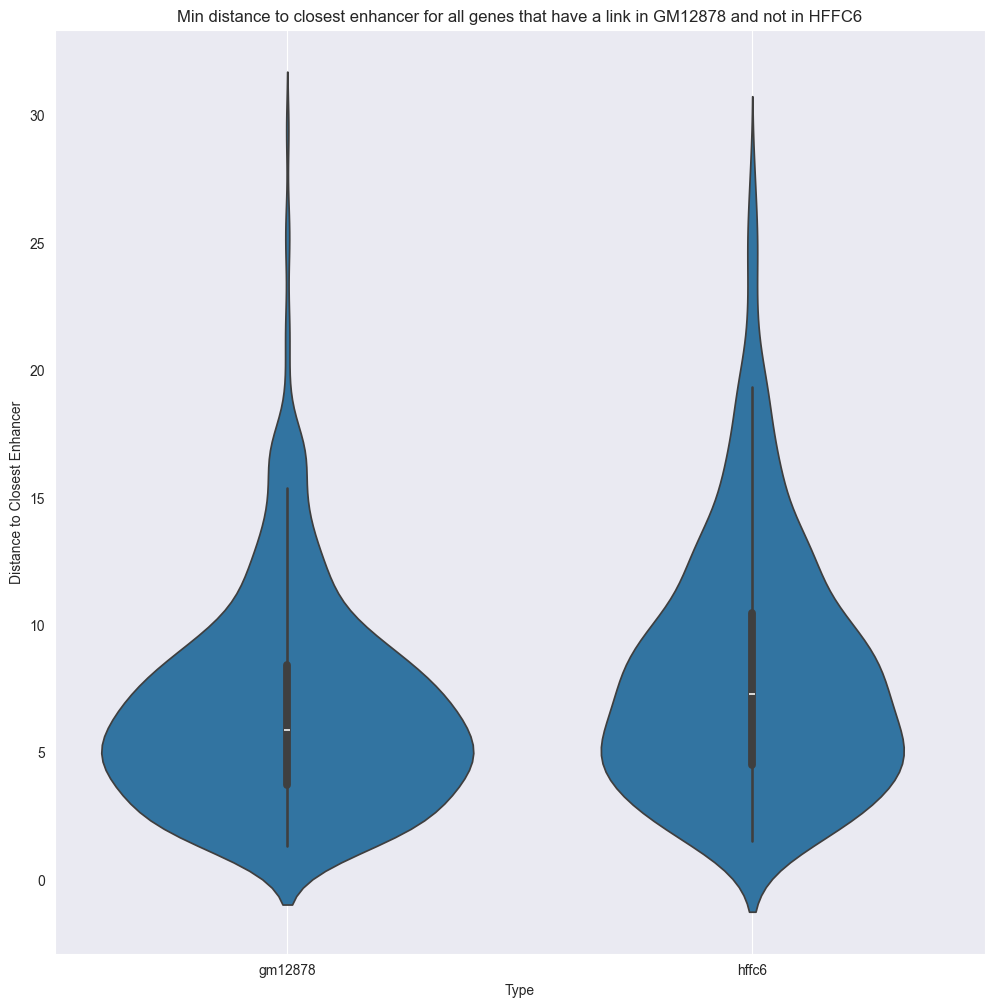

In [9]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(12, 12))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_gm12878_yes_link_hffc6_no_link,
)

plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in GM12878 and not in HFFC6")
plt.grid()
plt.show()

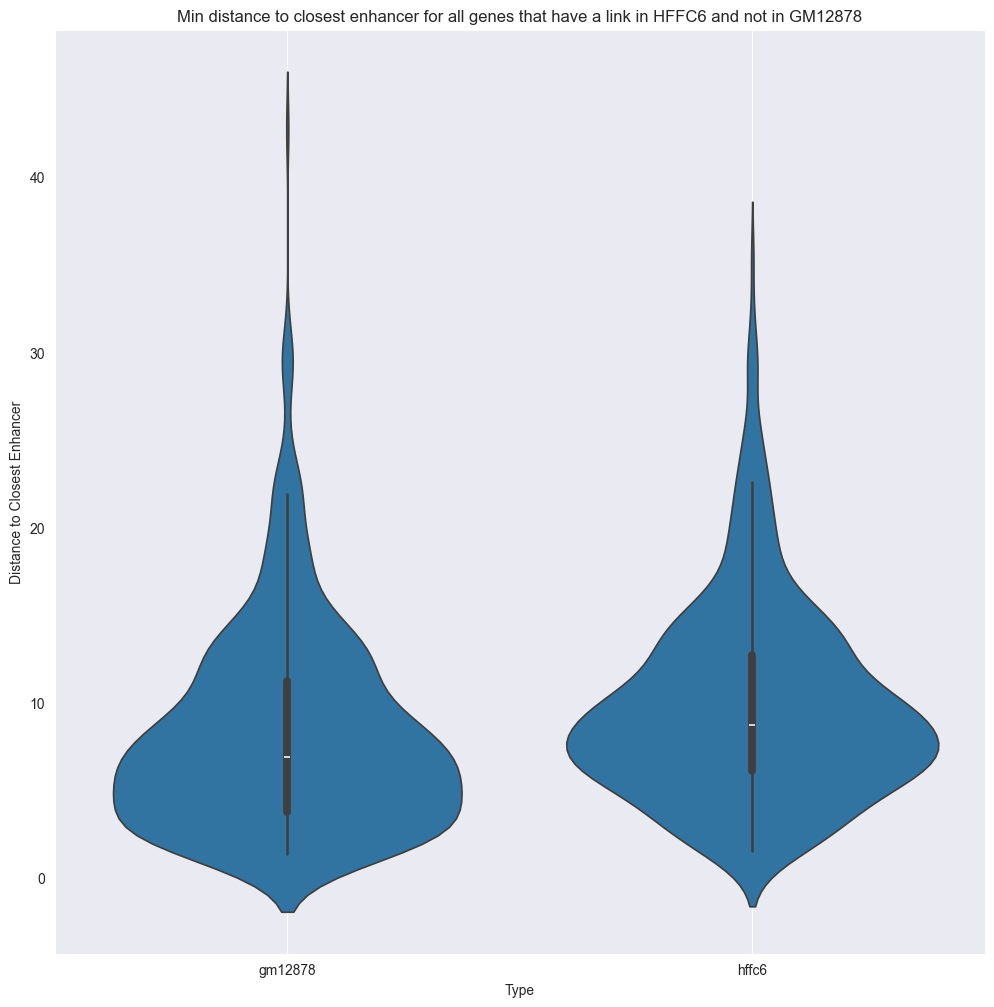

In [10]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(12, 12))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_gm12878_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in HFFC6 and not in GM12878")
plt.grid()
plt.show()

In [11]:
all_pairs_joined_hffc6_h1esc = (
    hffc6_neanderthal_all_pairs_with_has_link
    .merge(
        h1esc_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_hffc6", "_h1esc"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, hffc6_avg_dist, h1esc_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (hffc6, h1esc)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_hffc6_yes_link_h1esc_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_h1esc_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

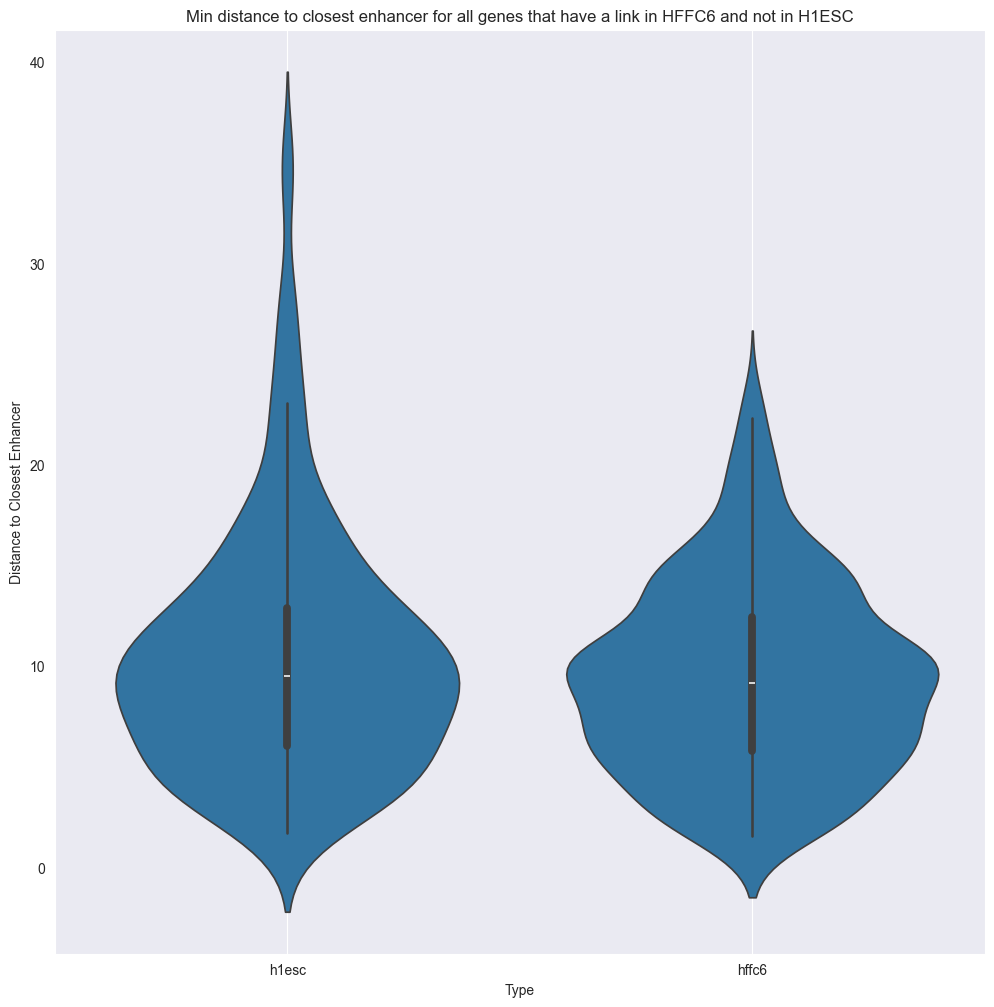

In [12]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
plt.figure(figsize=(12, 12))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_h1esc_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in HFFC6 and not in H1ESC")
plt.grid()
plt.show()

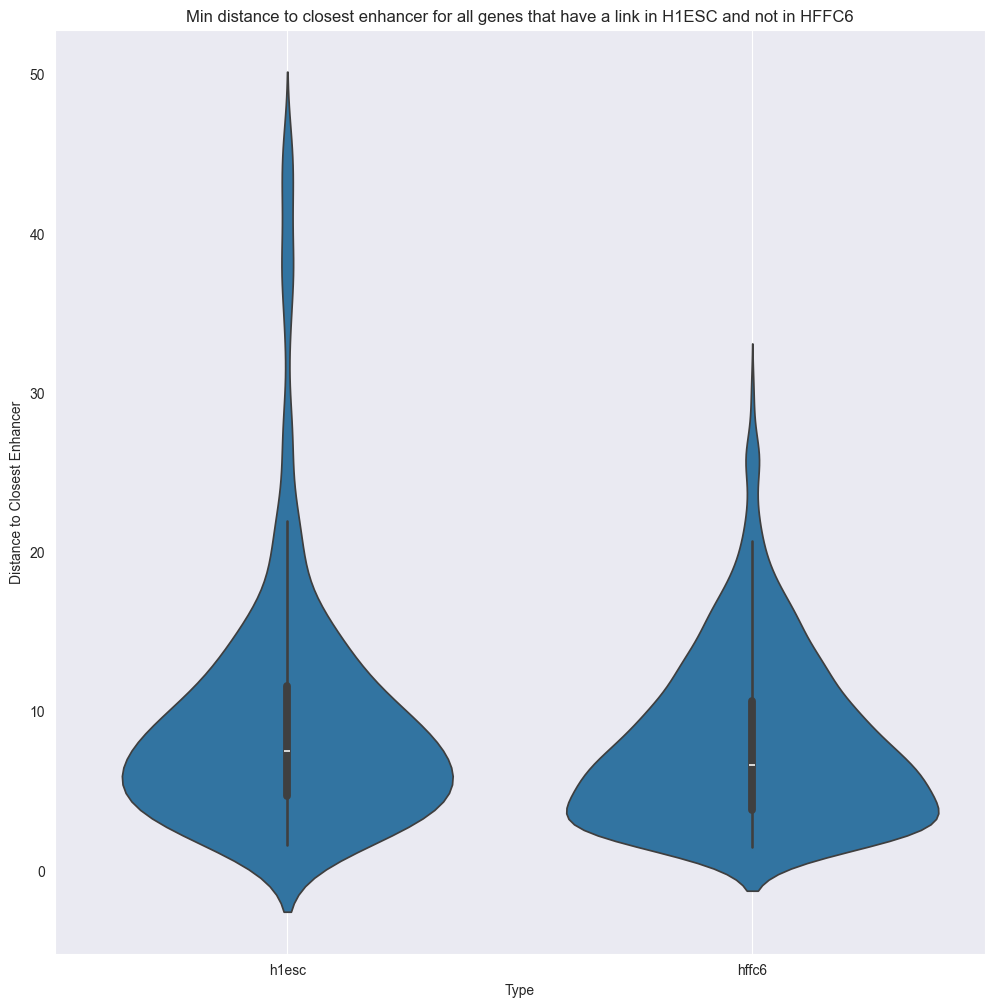

In [13]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
plt.figure(figsize=(12, 12))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_h1esc_yes_link_hffc6_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in H1ESC and not in HFFC6")
plt.grid()
plt.show()